In [1]:
import pickle
from wordcloud import WordCloud
from collections import Counter

file_path = "china_082019_1_tweets_io.pkl"

with open(file_path, "rb") as file:
    data = pickle.load(file)

print(data)


                     tweetid      userid user_display_name user_screen_name  \
0         235862198621184000   206027550        The Flecha        nessniven   
1         209026577105821696   206027550        The Flecha        nessniven   
2         569636537530392576   206027550        The Flecha        nessniven   
3         565259976412004353   206027550        The Flecha        nessniven   
4         577228355591757824   206027550        The Flecha        nessniven   
...                      ...         ...               ...              ...   
1898103  1030851529438199808  2993185258            HK時政直擊   HKpoliticalnew   
1898104  1008007504117182464  2993185258            HK時政直擊   HKpoliticalnew   
1898105  1008644414351159296  2993185258            HK時政直擊   HKpoliticalnew   
1898106  1015254766224486400  2993185258            HK時政直擊   HKpoliticalnew   
1898107  1004894882568155136  2993185258            HK時政直擊   HKpoliticalnew   

                user_reported_location  \
0        

In [2]:
import pickle

file_path = "china_082019_1_tweets_control.pkl"

with open(file_path, "rb") as file:
    data = pickle.load(file)

print(data)


                     tweetid  \
0                  952023384   
1                  952022178   
2                  952021218   
3                  951771087   
4                  951616438   
...                      ...   
1772641  1153473258127147008   
1772642  1153473121988386816   
1772643  1153473067835805696   
1772644  1153473019756437505   
1772645  1153472980292210689   

                                                tweet_text  \
0        s Road Blog: Joe Biden at the Sundome in Tampa...   
1        Breaking News: Missouri Officials Investigate ...   
2        Watch Michelle Obama Tonight http://tinyurl.co...   
3        Employees Take Cuts to Save Newark Star-Ledger...   
4        @africanaspects To me the general vibe was a l...   
...                                                    ...   
1772641  RT @seimeijinja: 暑中お見舞い申し上げます。 本日7月23日からは #大暑、...   
1772642  RT @sparmdrum: 大手から独立したら、仕事が出来なくなるのは芸能界だけに限らず、...   
1772643  RT @hiroloosaki: 昨日の2時半頃の民放テレビ局は全て吉本一色！私も見てたけど..

In [3]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

In [4]:
infoop_path = "china_082019_1_tweets_control.pkl" 
organic_path = "china_082019_1_tweets_io.pkl" 

with open(infoop_path, "rb") as f:
    infoop_df = pickle.load(f)

with open(organic_path, "rb") as f:
    organic_df = pickle.load(f)


In [5]:
infoop_df.shape

(1772646, 31)

In [6]:
organic_df.shape

(1898108, 31)

In [7]:
print("Unique Users (InfoOp):", infoop_df["user_screen_name"].nunique())
print("Unique Users (Organic):", organic_df["user_screen_name"].nunique())

Unique Users (InfoOp): 42120
Unique Users (Organic): 699


In [8]:
print("Columns in InfoOp Dataset:", infoop_df.columns.tolist())
print("Columns in Organic Dataset:", organic_df.columns.tolist())

Columns in InfoOp Dataset: ['tweetid', 'tweet_text', 'in_reply_to_tweetid', 'in_reply_to_userid', 'tweet_time', 'tweet_client_name', 'tweet_language', 'hashtags', 'user_mentions', 'urls', 'is_retweet', 'retweet_tweetid', 'retweet_userid', 'userid', 'user_profile_image_url', 'user_screen_name', 'account_creation_date', 'user_verified', 'user_protected', 'user_profile_description', 'user_profile_entites', 'user_profile_url', 'user_display_name', 'follower_count', 'following_count', 'user_profile_status_count', 'user_profile_listed_count', 'user_profile_favourites_count', 'user_reported_geo', 'user_reported_coordinates', 'user_reported_location']
Columns in Organic Dataset: ['tweetid', 'userid', 'user_display_name', 'user_screen_name', 'user_reported_location', 'user_profile_description', 'user_profile_url', 'follower_count', 'following_count', 'account_creation_date', 'account_language', 'tweet_language', 'tweet_text', 'tweet_time', 'tweet_client_name', 'in_reply_to_userid', 'in_reply_to

In [9]:
infoop_retweets = infoop_df["is_retweet"].sum()  
organic_retweets = organic_df["retweet_count"].sum()  

infoop_summary = {
    "Total Tweets": len(infoop_df),
    "Total Retweets": infoop_retweets,
    "Total Replies": infoop_df["in_reply_to_tweetid"].count(),  
}
organic_summary = {
    "Total Tweets": len(organic_df),
    "Total Retweets": organic_retweets,
    "Total Replies": organic_df["reply_count"].sum(),
}

eda_summary = pd.DataFrame([infoop_summary, organic_summary], index=["InfoOp", "Organic"])
print("\nSummary Statistics:\n", eda_summary)


Summary Statistics:
          Total Tweets  Total Retweets  Total Replies
InfoOp        1772646       1026404.0      1772646.0
Organic       1898108        282623.0       167287.0


In [10]:
threshold = 0.6  # 60%
infoop_missing = infoop_df.isnull().mean()
organic_missing = organic_df.isnull().mean()

infoop_cols_to_drop = infoop_missing[infoop_missing > threshold].index.tolist()
organic_cols_to_drop = organic_missing[organic_missing > threshold].index.tolist()

infoop_df = infoop_df.drop(columns=infoop_cols_to_drop)
organic_df = organic_df.drop(columns=organic_cols_to_drop)

# Drop unnecessary columns that do not contribute to analysis
unnecessary_cols = [
    "user_profile_image_url", "user_profile_entites", "user_profile_url",
    "user_verified", "user_protected", "user_reported_geo", "user_reported_coordinates"
]

infoop_df = infoop_df.drop(columns=[col for col in unnecessary_cols if col in infoop_df.columns], errors="ignore")
organic_df = organic_df.drop(columns=[col for col in unnecessary_cols if col in organic_df.columns], errors="ignore")

In [11]:
cleaned_summary = pd.DataFrame({
    "Dataset": ["InfoOp", "Organic"],
    "Original Columns": [len(infoop_missing), len(organic_missing)],
    "Removed Columns": [len(infoop_cols_to_drop), len(organic_cols_to_drop)],
    "Remaining Columns": [infoop_df.shape[1], organic_df.shape[1]]
})

In [12]:
cleaned_summary

,Dataset,Original Columns,Removed Columns,Remaining Columns
0,InfoOp,31,3,23
1,Organic,31,7,24


In [13]:
# Convert tweet_time to datetime format
infoop_df["tweet_time"] = pd.to_datetime(infoop_df["tweet_time"], errors="coerce")
organic_df["tweet_time"] = pd.to_datetime(organic_df["tweet_time"], errors="coerce")

# Convert available numeric columns
numeric_cols_infoop = ["follower_count", "following_count", "user_profile_status_count", "user_profile_listed_count"]
numeric_cols_organic = ["follower_count", "following_count", "retweet_count", "reply_count", "like_count"]

for col in numeric_cols_infoop:
    if col in infoop_df.columns:
        infoop_df[col] = pd.to_numeric(infoop_df[col], errors="coerce")

for col in numeric_cols_organic:
    if col in organic_df.columns:
        organic_df[col] = pd.to_numeric(organic_df[col], errors="coerce")

/var/folders/3t/_b6g8knj39g9p92hxh64xcfc0000gn/T/ipykernel_47036/305850210.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  infoop_df["tweet_time"] = pd.to_datetime(infoop_df["tweet_time"], errors="coerce")


In [14]:
user_stats = pd.DataFrame({
    "Dataset": ["InfoOp", "Organic"],
    "Total Tweets": [len(infoop_df), len(organic_df)],
    "Unique Users": [infoop_df["user_screen_name"].nunique(), organic_df["user_screen_name"].nunique()],
    "Total Retweets": [infoop_df["is_retweet"].sum(), organic_df["retweet_count"].sum()],
    "Total Replies": [infoop_df["in_reply_to_tweetid"].count(), organic_df["reply_count"].sum()],
})

/var/folders/3t/_b6g8knj39g9p92hxh64xcfc0000gn/T/ipykernel_47036/144024290.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  infoop_df.set_index("tweet_time").resample("M").count()["tweetid"].plot(label="InfoOp", color="red")
/var/folders/3t/_b6g8knj39g9p92hxh64xcfc0000gn/T/ipykernel_47036/144024290.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  organic_df.set_index("tweet_time").resample("M").count()["tweetid"].plot(label="Organic", color="blue")


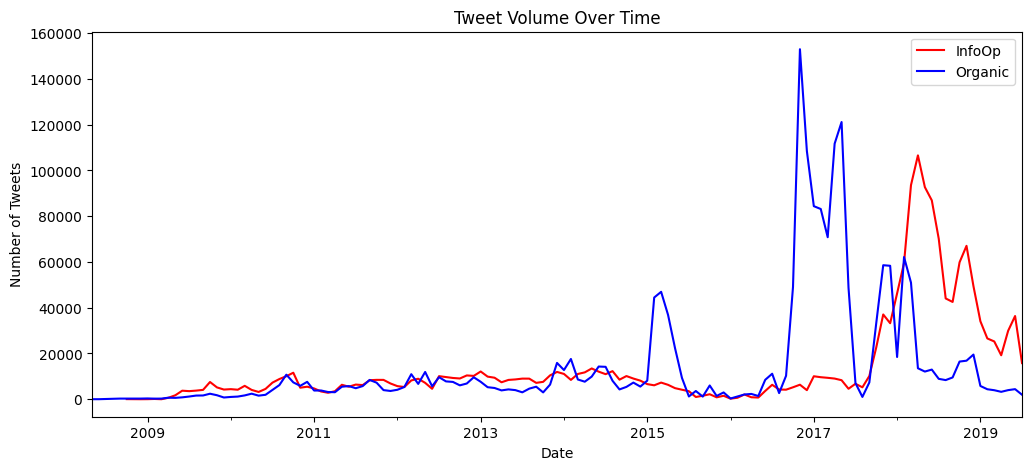

In [15]:
# ---- EDA: Tweet Volume Over Time ----
plt.figure(figsize=(12, 5))
infoop_df.set_index("tweet_time").resample("M").count()["tweetid"].plot(label="InfoOp", color="red")
organic_df.set_index("tweet_time").resample("M").count()["tweetid"].plot(label="Organic", color="blue")
plt.legend()
plt.title("Tweet Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.show()

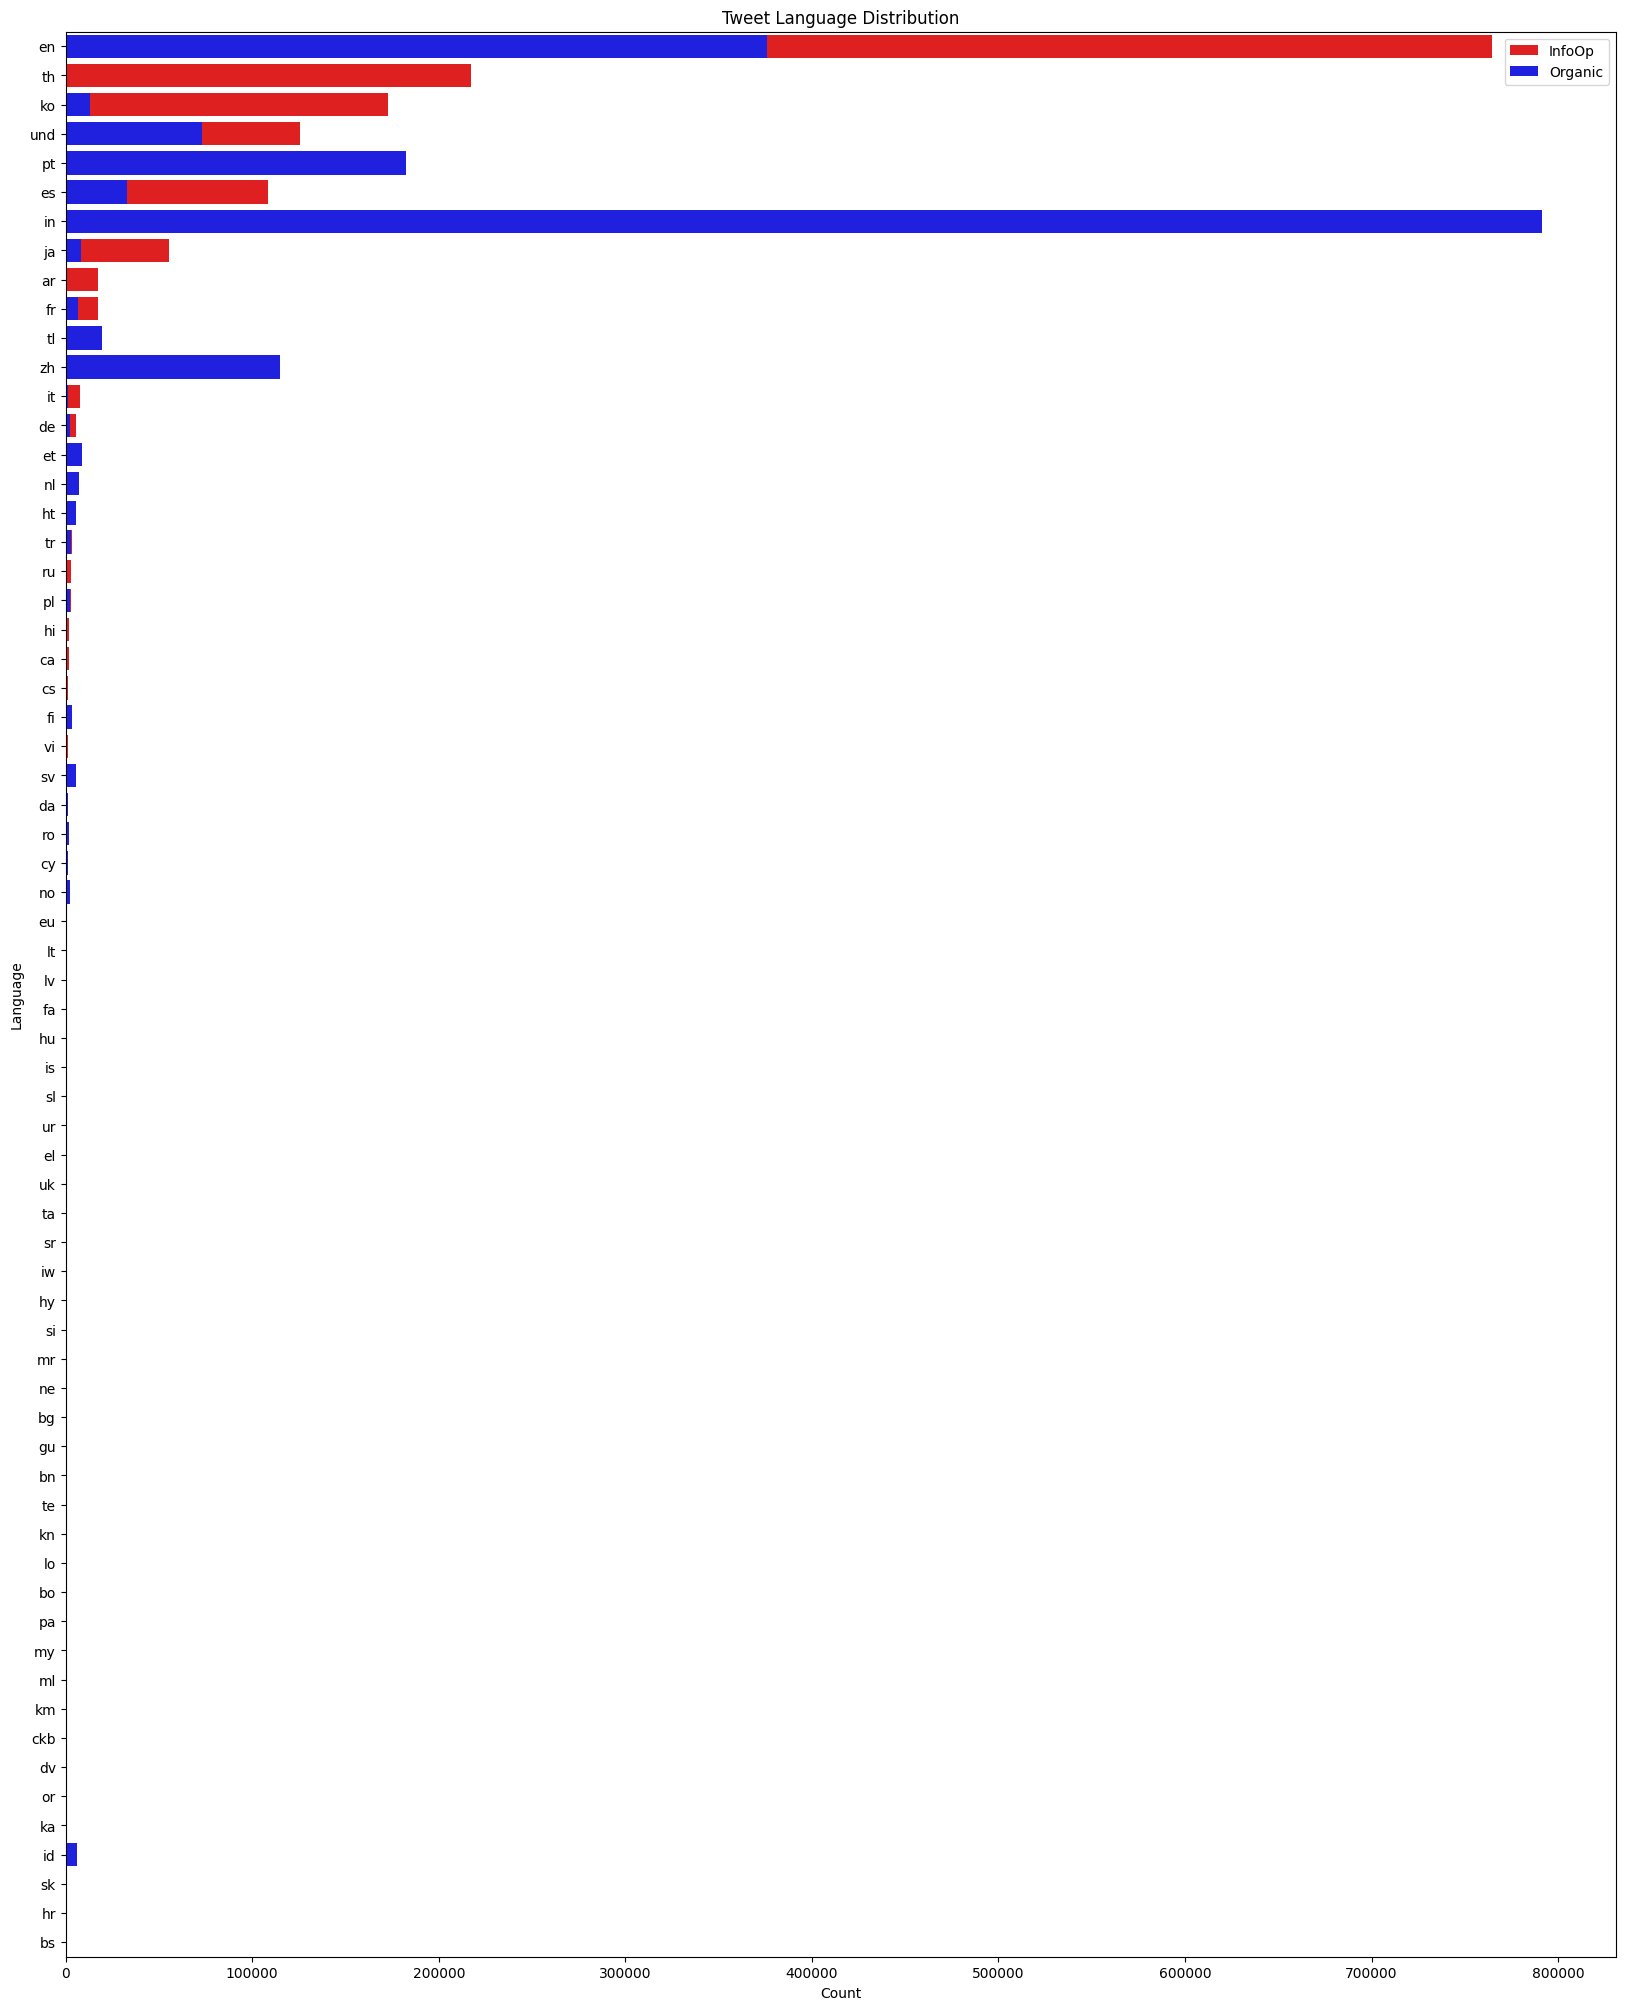

In [16]:
# ---- EDA: Tweet Language Distribution ----
plt.figure(figsize=(20, 25))
sns.countplot(y=infoop_df["tweet_language"], order=infoop_df["tweet_language"].value_counts().index, color="red", label="InfoOp")
sns.countplot(y=organic_df["tweet_language"], order=organic_df["tweet_language"].value_counts().index, color="blue", label="Organic")
plt.legend()
plt.title("Tweet Language Distribution")
plt.xlabel("Count")
plt.ylabel("Language")
plt.show()

In [17]:
# ---- EDA: Most Used Hashtags ----
infoop_hashtags = Counter([hashtag for hashtags in infoop_df["hashtags"].dropna() for hashtag in hashtags])
organic_hashtags = Counter([hashtag for hashtags in organic_df["hashtags"].dropna() for hashtag in hashtags])

infoop_top_hashtags = pd.DataFrame(infoop_hashtags.most_common(10), columns=["Hashtag", "Count"])
organic_top_hashtags = pd.DataFrame(organic_hashtags.most_common(10), columns=["Hashtag", "Count"])

print("\n🔹 Top Hashtags - InfoOp:")
print(infoop_top_hashtags)

print("\n🔹 Top Hashtags - Organic:")
print(organic_top_hashtags)



🔹 Top Hashtags - InfoOp:
          Hashtag  Count
0             워너원  42326
1    iHeartAwards  31768
2  PremiosMTVMiaw  23125
3     BestFanArmy  21209
4              RT  19784
5        WANNAONE  18214
6             EXO  18162
7            강다니엘  16801
8             BTS  13337
9         BTSARMY  11851

🔹 Top Hashtags - Organic:
  Hashtag  Count
0     ptl  81148
1    pltl  48216
2    tlrp  36535
3     nrp  21922
4      RT   8437
5     WTL   6719
6     rtl   6552
7     wtl   6493
8     PTL   6166
9     RTL   5739


In [18]:
# ---- EDA: Most Used URLs ----
infoop_urls = Counter([url for urls in infoop_df["urls"].dropna() for url in urls])
organic_urls = Counter([url for urls in organic_df["urls"].dropna() for url in urls])

infoop_top_urls = pd.DataFrame(infoop_urls.most_common(10), columns=["URL", "Count"])
organic_top_urls = pd.DataFrame(organic_urls.most_common(10), columns=["URL", "Count"])

print("\n🔹 Top URLs - InfoOp:")
print(infoop_top_urls)

print("\n🔹 Top URLs - Organic:")
print(organic_top_urls)


🔹 Top URLs - InfoOp:
                                                 URL  Count
0                         http://gigam.es/mtw_Tribez   1998
1       http://www.peopleschoice.com/pca/votenow.jsp   1671
2                        http://gigam.es/pmtw_Tribez   1601
3                        http://gigam.es/imtw_Tribez    949
4      https://support.twitter.com/articles/20169199    916
5                         http://gigam.es/etw_Tribez    838
6                              http://sabang33.pe.kr    743
7  http://www.eac.gov/voter_resources/register_to...    697
8                              http://at.mtv.com/2Mz    608
9                               http://anti-toto.com    594

🔹 Top URLs - Organic:
                                                 URL  Count
0                                                     26494
1                                    http://tandl.me  11284
2                                 http://ow.ly/N78vF   9160
3                            https://pic.twitter.com   

In [19]:
# ---- EDA: Most Mentioned Users ----
infoop_mentions = Counter([mention for mentions in infoop_df["user_mentions"].dropna() for mention in mentions])
organic_mentions = Counter([mention for mentions in organic_df["user_mentions"].dropna() for mention in mentions])

infoop_top_mentions = pd.DataFrame(infoop_mentions.most_common(10), columns=["User Mentioned", "Count"])
organic_top_mentions = pd.DataFrame(organic_mentions.most_common(10), columns=["User Mentioned", "Count"])

print("\n🔹 Top Mentions - InfoOp:")
print(infoop_top_mentions)

print("\n🔹 Top Mentions - Organic:")
print(organic_top_mentions)


🔹 Top Mentions - InfoOp:
       User Mentioned  Count
0           335141638  55324
1  873115441303924736  28404
2            27260086  12417
3  872005518084251648   7156
4           573299587   5934
5          3030158859   5199
6  878204370403250176   4208
7  864525927438536707   3357
8            10228272   3330
9          1627921021   3275

🔹 Top Mentions - Organic:
  User Mentioned    Count
0              [  1752850
1              ]  1752850
2              2  1171866
3              1  1137012
4              3  1037694
5              9   975264
6              0   969787
7              8   969365
8              4   944193
9              6   943162


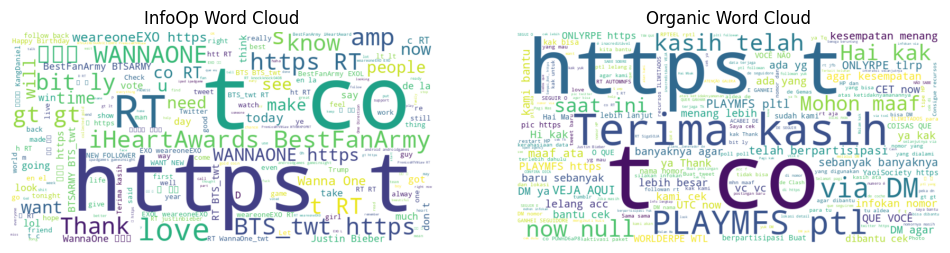

In [20]:
# ---- EDA: Word Cloud of Most Used Words in Tweets ----
infoop_text = " ".join(infoop_df["tweet_text"].dropna().astype(str))
organic_text = " ".join(organic_df["tweet_text"].dropna().astype(str))

infoop_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(infoop_text)
organic_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(organic_text)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(infoop_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("InfoOp Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(organic_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Organic Word Cloud")

plt.show()

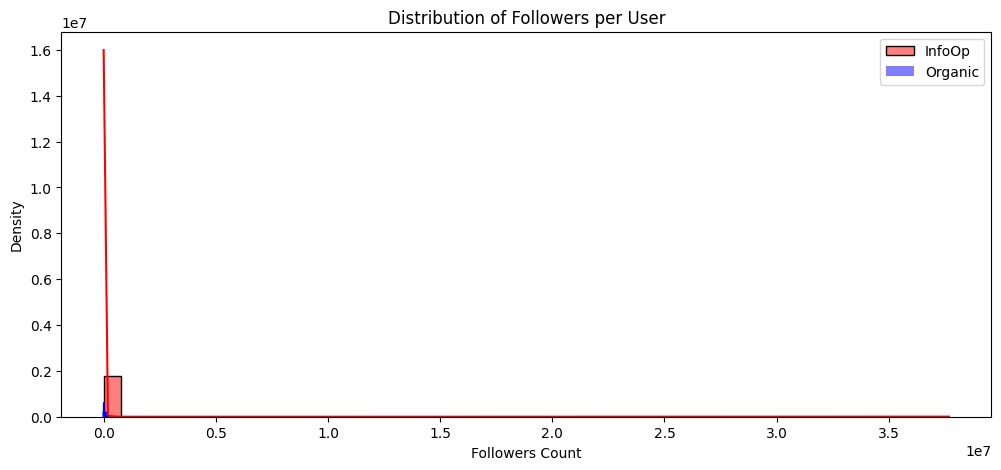

In [21]:
# ---- EDA: Distribution of Followers per User ----
plt.figure(figsize=(12, 5))
sns.histplot(infoop_df["follower_count"].dropna(), bins=50, kde=True, color="red", label="InfoOp")
sns.histplot(organic_df["follower_count"].dropna(), bins=50, kde=True, color="blue", label="Organic")
plt.legend()
plt.title("Distribution of Followers per User")
plt.xlabel("Followers Count")
plt.ylabel("Density")
plt.show()

In [22]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

In [23]:
nltk.download('stopwords')
nltk.download('wordnet')

# Load datasets
infoop_path = "china_082019_1_tweets_control.pkl" 
organic_path = "china_082019_1_tweets_io.pkl"  

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nissanthneelakandanabirami/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nissanthneelakandanabirami/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
# Labeling: 1 for InfoOp (manipulative tweets), 0 for Organic (legitimate tweets)
infoop_df["label"] = 1
organic_df["label"] = 0

In [25]:
print("InfoOp Dataset Columns:", infoop_df.columns.tolist())

InfoOp Dataset Columns: ['tweetid', 'tweet_text', 'in_reply_to_tweetid', 'in_reply_to_userid', 'tweet_time', 'tweet_client_name', 'tweet_language', 'hashtags', 'user_mentions', 'urls', 'is_retweet', 'retweet_tweetid', 'retweet_userid', 'userid', 'user_screen_name', 'account_creation_date', 'user_profile_description', 'user_display_name', 'follower_count', 'following_count', 'user_profile_status_count', 'user_profile_listed_count', 'user_profile_favourites_count', 'label']


In [26]:
print("Organic Dataset Columns:", organic_df.columns.tolist())

Organic Dataset Columns: ['tweetid', 'userid', 'user_display_name', 'user_screen_name', 'user_reported_location', 'user_profile_description', 'follower_count', 'following_count', 'account_creation_date', 'account_language', 'tweet_language', 'tweet_text', 'tweet_time', 'tweet_client_name', 'is_retweet', 'latitude', 'longitude', 'quote_count', 'reply_count', 'like_count', 'retweet_count', 'hashtags', 'urls', 'user_mentions', 'label']


In [27]:
infoop_features = ["tweet_text", "follower_count", "following_count", "is_retweet", "user_mentions", "urls", "hashtags", 
                   "user_profile_status_count", "user_profile_listed_count", "user_profile_favourites_count", "label"]
organic_features = ["tweet_text", "follower_count", "following_count", "is_retweet", "user_mentions", "urls", "hashtags",
                    "quote_count", "reply_count", "like_count", "retweet_count", "label"]

In [28]:
infoop_df = infoop_df[infoop_df.columns.intersection(infoop_features)]
organic_df = organic_df[organic_df.columns.intersection(organic_features)]

In [29]:
# Convert missing engagement metrics in InfoOp to 0
for col in ["quote_count", "reply_count", "like_count", "retweet_count"]:
    infoop_df[col] = 0 

# Convert missing "user_profile_status_count" for Organic to 0
for col in ["user_profile_status_count", "user_profile_listed_count", "user_profile_favourites_count"]:
    organic_df[col] = 0  

# Merge datasets
df = pd.concat([infoop_df, organic_df], axis=0).reset_index(drop=True)

# Convert numeric columns to proper type
numeric_cols = ["follower_count", "following_count", "quote_count", "reply_count", "like_count", "retweet_count", 
                "user_profile_status_count", "user_profile_listed_count", "user_profile_favourites_count"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0)

# Convert "is_retweet" and "user_mentions" count
df["is_retweet"] = df["is_retweet"].astype(int)
df["user_mentions"] = df["user_mentions"].apply(lambda x: len(x) if isinstance(x, list) else 0)
df["urls"] = df["urls"].apply(lambda x: len(x) if isinstance(x, list) else 0)
df["hashtags"] = df["hashtags"].apply(lambda x: len(x) if isinstance(x, list) else 0)

In [30]:
stop_words = set(stopwords.words("english"))
lemmatizer = nltk.WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove mentions
    text = re.sub(r"#\w+", "", text)  # Remove hashtags
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])  # Lemmatization & stopword removal
    return text

df["clean_text"] = df["tweet_text"].apply(clean_text)

In [31]:
df = df.drop_duplicates().reset_index(drop=True)

In [32]:
X_text = df["clean_text"]
X_numeric = df.drop(columns=["tweet_text", "clean_text", "label"])
y = df["label"]

X_train_text, X_test_text, X_train_numeric, X_test_numeric, y_train, y_test = train_test_split(
    X_text, X_numeric, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

# Combine text & numeric features
X_train = np.hstack((X_train_tfidf.toarray(), X_train_numeric))
X_test = np.hstack((X_test_tfidf.toarray(), X_test_numeric))

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Initialize and fit Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba) 
report = classification_report(y_test, y_pred)

# Display Results
print("\n🔹 Classification Report:\n", report)
print(f"\n🔹 Accuracy: {accuracy:.4f}, AUC: {auc:.4f}")



🔹 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    342948
           1       1.00      1.00      1.00    349363

    accuracy                           1.00    692311
   macro avg       1.00      1.00      1.00    692311
weighted avg       1.00      1.00      1.00    692311


🔹 Accuracy: 1.0000, AUC: 1.0000
